In [1]:
# Install 
!pip install transformers gradio sentencepiece
!pip install numpy 



Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import gradio as gr

# Load the pre-trained TrOCR model and processor
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-small-handwritten")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-small-handwritten")

# Define the function to recognize text from an image
def recognize_text(image):
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return text

# Create a Gradio interface
interface = gr.Interface(
    fn=recognize_text,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Interactive demo: TrOCR",
    description="Demo for Microsoft’s TrOCR, an encoder-decoder model for OCR on single-text line images.",
)


# Launch the interface
interface.launch()


config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [3]:
#Imports
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Load the model
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-small-handwritten")


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# Inspect the encoder of the model
model.encoder


DeiTModel(
  (embeddings): DeiTEmbeddings(
    (patch_embeddings): DeiTPatchEmbeddings(
      (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): DeiTEncoder(
    (layer): ModuleList(
      (0): DeiTLayer(
        (attention): DeiTAttention(
          (attention): DeiTSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): DeiTSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): DeiTIntermediate(
          (dense): Linear(in_features=384, out_features=1536, bias=True)
          (intermediate_act_fn): GELUActivation

In [5]:
# Inspect the decoder of the model
model.decoder

TrOCRForCausalLM(
  (model): TrOCRDecoderWrapper(
    (decoder): TrOCRDecoder(
      (embed_tokens): Embedding(64044, 256, padding_idx=1)
      (embed_positions): TrOCRLearnedPositionalEmbedding(514, 256)
      (layernorm_embedding): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0): TrOCRDecoderLayer(
          (self_attn): TrOCRAttention(
            (k_proj): Linear(in_features=256, out_features=256, bias=True)
            (v_proj): Linear(in_features=256, out_features=256, bias=True)
            (q_proj): Linear(in_features=256, out_features=256, bias=True)
            (out_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): TrOCRAttention(
            (k_proj): Linear(in_features=384, out_features=256, bias=True)
            (v_proj): Linear(in_features=384, out_features=2

In [6]:
# Function to count the parameters of the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

# Count parameters in the encoder
encoder_params = count_parameters(model.encoder)

# Count parameters in the decoder
decoder_params = count_parameters(model.decoder)

encoder_params, decoder_params


(21960192, 39636480)

In [7]:
# Imports
import numpy as np

In [8]:
def calculate_writing_time(total_words, words_per_day, days_per_week, weeks_per_year, average_human_lifespan):
    """
    Calculate the time required to write a given number of words in lifetimes.

    Parameters:
    - total_words: total number of words to be written.
    - words_per_day: number of words written per day.
    - days_per_week: number of days dedicated to writing per week.
    - weeks_per_year: number of weeks dedicated to writing per year.
    - average_human_lifespan: average lifespan of a human in years.

    Returns:
    - time_to_write_lifetimes: time to write the given words in lifetimes.
    """

    #################################################
    ## TODO for students: fill in the missing variables ##
    # Fill out function and remove
    raise NotImplementedError("Student exercise: fill in the missing variables")
    #################################################
    
    words_per_year = words_per_day * days_per_week * weeks_per_year

    # Calculate the time to write in years
    time_to_write_years = total_words / ... 

    # Calculate the time to write in lifetimes
    time_to_write_lifetimes = time_to_write_years / average_human_lifespan

    return time_to_write_lifetimes

# Example values
total_words = 5e9
words_per_day = 1500
days_per_week = 6
weeks_per_year = 50
average_human_lifespan = 80

# Uncomment the code below to test your function

# Test the function
#time_to_write_lifetimes_roberta = calculate_writing_time(
    #total_words, 
    #words_per_day, 
    #days_per_week, 
    #weeks_per_year, 
    #average_human_lifespan
#)

# Print the result
#print(f"Time to write {total_words} words in lifetimes: {time_to_write_lifetimes_roberta} lifetimes")


In [9]:
# to_remove solution
def calculate_writing_time(total_words, words_per_day, days_per_week, weeks_per_year, average_human_lifespan):
    """
    Calculate the time required to write a given number of words in lifetimes.

    Parameters:
    - total_words: total number of words to be written.
    - words_per_day: number of words written per day.
    - days_per_week: number of days dedicated to writing per week.
    - weeks_per_year: number of weeks dedicated to writing per year.
    - average_human_lifespan: average lifespan of a human in years.

    Returns:
    - time_to_write_lifetimes: time to write the given words in lifetimes.
    """
    
    words_per_year = words_per_day * days_per_week * weeks_per_year

    # Calculate the time to write in years
    time_to_write_years = total_words / words_per_year 

    # Calculate the time to write in lifetimes
    time_to_write_lifetimes = time_to_write_years / average_human_lifespan

    return time_to_write_lifetimes

# Example values
total_words = 5e9
words_per_day = 1500
days_per_week = 6
weeks_per_year = 50
average_human_lifespan = 80

# Uncomment the code below to test your function

# Test the function
#time_to_write_lifetimes_roberta = calculate_writing_time(
    #total_words, 
    #words_per_day, 
    #days_per_week, 
    #weeks_per_year, 
    #average_human_lifespan
#)

# Print the result
#print(f"Time to write {total_words} words in lifetimes: {time_to_write_lifetimes_roberta} lifetimes")


In [10]:
#Exploring Llama 2
total_tokens_llama2 = 2e12
total_words_llama2 = 2e12 / 1.5 #assuming 1.5 words per token

In [11]:
# Time to generate text
time_to_write_lifetimes_llama = calculate_writing_time(total_words_llama2, words_per_day, days_per_week, weeks_per_year, average_human_lifespan)

In [12]:
#Install and imports
!pip install torch torchvision trdg
!pip install Pillow==9.5.0
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


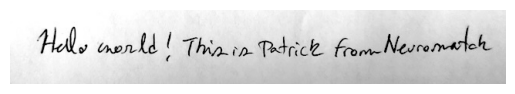

In [13]:
# Path to the image
image_path = '../static/img_1235.jpg'

# Open the image
image = Image.open(image_path)
if image.mode != 'RGB':
    image = image.convert('RGB')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


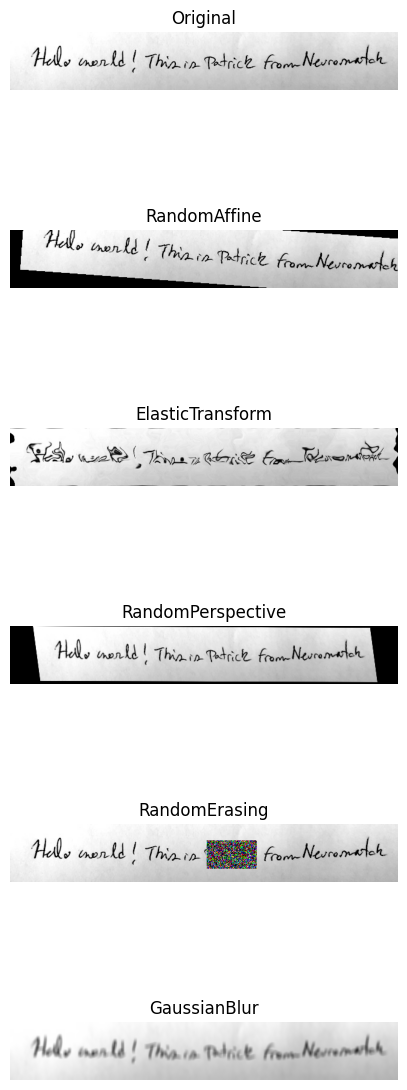

In [14]:
# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image = to_tensor(image)

# Define each transformation separately
# RandomAffine: applies rotations, translations, scaling. Here, rotates by up to ±15 degrees,
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))

# ElasticTransform: applies elastic distortions to the image. The 'alpha' parameter controls
# the intensity of the distortion.
elastic = transforms.ElasticTransform(alpha=50.0)

# RandomPerspective: applies random perspective transformations with a specified distortion scale.
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)

# RandomErasing: randomly erases a rectangle area in the image.
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)

# GaussianBlur: applies gaussian blur with specified kernel size and sigma range. 
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.4, 5))

# A list of all transformations for iteration
transformations = [affine, elastic, perspective, erasing, gaussian_blur]

# Vertical stacking of transformations
fig, axs = plt.subplots(len(transformations) + 1, 1, figsize=(5, 15))  

# Permute the image dimensions from (C, H, W) to (H, W, C) for display
display_image = image.permute(1, 2, 0)

axs[0].imshow(display_image)
axs[0].set_title('Original')
axs[0].axis('off')

for i, transform in enumerate(transformations, 1):
    augmented_image = transforms.Compose([transform])(image)
    # Permute the augmented image dimensions from (C, H, W) to (H, W, C) for display
    display_augmented = augmented_image.permute(1, 2, 0)

    axs[i].imshow(display_augmented)
    axs[i].set_title(transform.__class__.__name__)
    axs[i].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


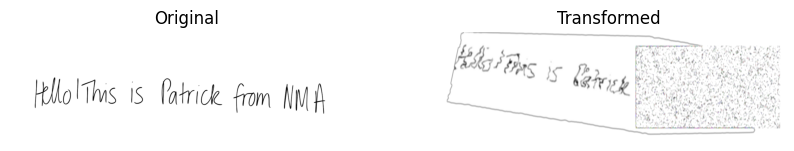

In [15]:
# Path to the image
image_path = '../static/image_augmentation.png'

# Open the image
image = Image.open(image_path)

# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)

# Define your transformations here
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))
elastic = transforms.ElasticTransform(alpha=90.0)
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))

# Combine all the transformations
all_transforms = transforms.Compose([
    affine,
    elastic,
    perspective,
    erasing,
    gaussian_blur
])

# Apply combined transformation
augmented_image_tensor = all_transforms(image_tensor)

# Set up matplotlib subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[0].set_title('Original')
axs[0].axis('off')

# Display augmented image
axs[1].imshow(augmented_image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[1].set_title('Transformed')
axs[1].axis('off')

plt.show()


Missing modules for handwritten text generation.


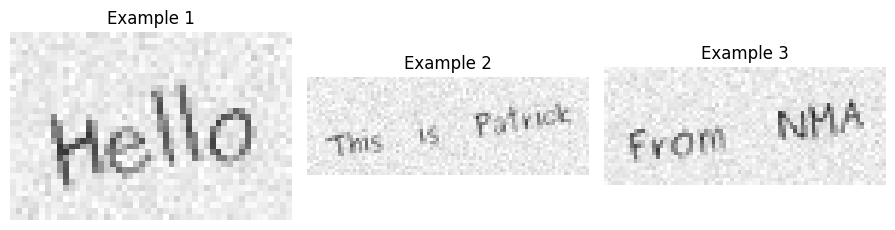

In [16]:
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt

# Define your strings
strings = ['Hello', 'This is Patrick', 'From NMA']  # Update this list as needed

# Create a generator with the specified font
generator = GeneratorFromStrings(
    strings,
    space_width=2,
    skewing_angle=8,
    count=3,  # number of images to generate
    fonts=['Purisa']  # Update or add more fonts as needed
)

# Setup matplotlib figure and display images
plt.figure(figsize=(15, 3))
for i, (text_img, lbl) in enumerate(generator, 1):
    ax = plt.subplot(1, 5, i)  # Adjust the number of subplots if needed
    plt.imshow(text_img)
    plt.title(f"Example {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
from IPython.display import IFrame

IFrame("https://www.calligrapher.ai/", width=800, height=600)